In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('skroutz_watches.csv')
data.head()

,78859,daniel wellington classic petite dw00100163,4825,78626,Daniel Wellington Classic Petite Sterling Melrose 1 32mm,355,Women's Watches
0,78860,daniel wellington dw00100163,3116,78626,Daniel Wellington Classic Petite Sterling Melr...,355,Women's Watches
1,78861,daniel wellington dw00100163,2848,78626,Daniel Wellington Classic Petite Sterling Melr...,355,Women's Watches
2,78862,daniel wellington classic petite 32mm ladies w...,3371,78626,Daniel Wellington Classic Petite Sterling Melr...,355,Women's Watches
3,78863,daniel wellington classic petite melrose 32mm ...,945,78626,Daniel Wellington Classic Petite Sterling Melr...,355,Women's Watches
4,78864,roli chiros daniel wellington classic petite m...,3411,78626,Daniel Wellington Classic Petite Sterling Melr...,355,Women's Watches


In [2]:
data = data.drop(['78859', 'Women\'s Watches', '355'],1 )
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,daniel wellington classic petite dw00100163,4825,78626,Daniel Wellington Classic Petite Sterling Melrose 1 32mm
0,29290,105,32899,10991
1,29290,87,32899,10991
2,28336,122,32899,10991
3,28473,20,32899,10991
4,84470,124,32899,10991


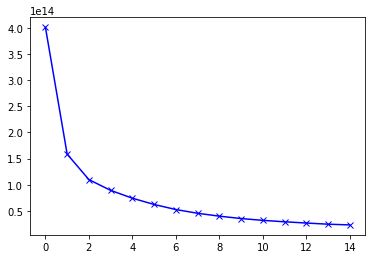

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()


In [4]:
kmeans = KMeans(3)
Y_kmeans = kmeans.fit_predict(data)


from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

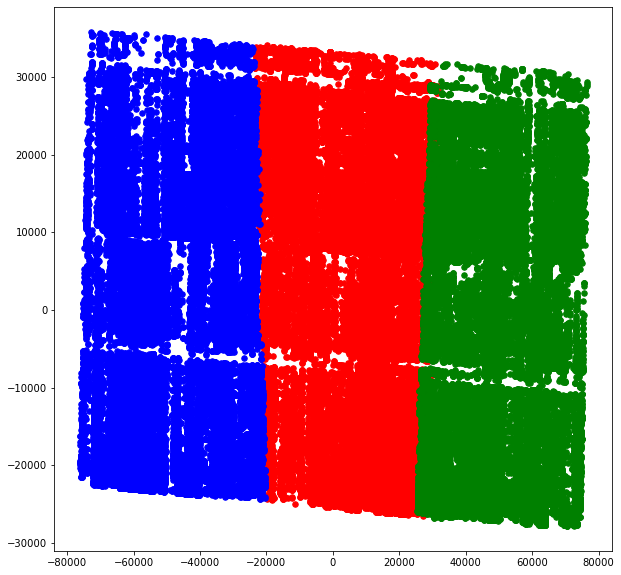

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='green', label='Cluster 3')
plt.show()
